#### Import numpy, matplotlib.pyplot and make it inline

In [177]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#### Utility functions

In [178]:
def plot_loss_epoch(loss, alpha):
    plt.figure(figsize=(10, 8))
    plt.plot(loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

def plot_theta_loss(theta, loss, alpha, xlabel):
    plt.figure(figsize=(10, 8))
    plt.plot(theta, loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel(xlabel)
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

def plot_lines(X, y, hypothesis):
    plt.figure(figsize=(10, 8))
    for h in hypothesis:
        plt.plot(X, h, color='r')
    
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.xlabel('y')
    plt.grid()
    plt.show()

def plot_best_line(X, y, h):
    plt.figure(figsize=(10, 8))
    plt.plot(X, h, color='r')
    
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.xlabel('y')
    plt.grid()
    plt.show()

#### Read RegData csv file into numpy array 

In [179]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [180]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. 
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [181]:
X = data[:, 0]
y = data[:, 1]

#### Explore your data

In [182]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [183]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

Text(0.5, 0, 'y')

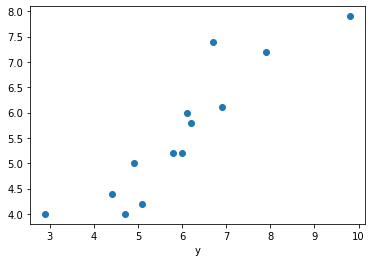

In [184]:
plt.scatter(X, y)
plt.xlabel('X')
plt.xlabel('y')

## Momentum

#### Full Batch

In [185]:
def Momentum_single_variable_batch(X, y, alpha, gamma, maxNumIters):

    gradient_check = 0.001
    cost_check = 0.001
    v_0 = 0
    v_1 = 0
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    hypothesis = []
    for i in range(maxNumIters):
        print(f'****************** Epoch {i} ********************')
        print()

        m = len(X)

        thetas_0_list.append(theta_0)
        thetas_1_list.append(theta_1)

        # 2- Prediction
        h = theta_0 + theta_1 * X
        hypothesis.append(h)

        # 3- Evaluate Prediction (Calculate loss/cost function)
        error = h - y

        # j = np.sum(error**2) / (2*m) # --> Normal equation
        # j = np.linalg.norm(error)**2 / (2*m) # --> By vector Norm
        mse = error @ error / (2*m) # --> By dot product

        j = np.sum(mse)
        cost.append(j)

        # 4- Get gradient
        d_theta_0 = np.sum(error) / m
        d_theta_1 = np.sum(error*X) / m

        d_theta = np.array([[d_theta_0],
                            [d_theta_1]])
        
        d_theta_norm = np.linalg.norm(d_theta)

        # 5- Update parameters
        v_0 = alpha * d_theta_0 + gamma * v_0
        v_1 = alpha * d_theta_1 + gamma * v_1
        
        theta_0 = theta_0 - v_0
        theta_1 = theta_1 - v_1

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        if i > 0:
            if d_theta_norm <= gradient_check or abs(cost[-2] - cost[-1]) <= cost_check:
                break
        
        print('theta_0_new', theta_0)
        print('theta_1_new', theta_1)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {i+1} epochs')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

#### Mini Batch

In [186]:
def Momentum_single_variable_mini_batch(X, y, alpha, gamma, maxNumIters, batch_size=None):

    # if batch not specified, consider it as full batch
    if not batch_size:
      batch_size = len(X)
      
    gradient_check = 0.001
    cost_check = 0.001
    v_0 = 0
    v_1 = 0
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    cost_per_epoch = []
    hypothesis = []

    for epoch in range(maxNumIters):
        print(f'****************** Epoch {epoch} ********************')
        print()

        for i in range(len(X) // batch_size):
          
          thetas_0_list.append(theta_0)
          thetas_1_list.append(theta_1)

          # 2- Prediction
          start = i * batch_size
          end = i * batch_size + batch_size

          h = theta_0 + theta_1 * X[start:end]
          hypothesis.append(h)

          # 3- Evaluate Prediction (Calculate loss/cost function)
          error = h - y[start:end]
          mse = error @ error / (2*batch_size)
          j = np.sum(mse)
          cost.append(j)

          # 4- Get gradient
          d_theta_0 = np.sum(error) / batch_size
          d_theta_1 = np.sum(error * X[start:end]) / batch_size

          d_theta = np.array([[d_theta_0],
                              [d_theta_1]])
          
          # 5- Update parameters
          v_0 = alpha * d_theta_0 + gamma * v_0
          v_1 = alpha * d_theta_1 + gamma * v_1
          
          theta_0 = theta_0 - v_0
          theta_1 = theta_1 - v_1

        d_theta_norm = np.linalg.norm(d_theta)

        cost_per_epoch.append(j)
        
        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        if epoch > 0:
            if d_theta_norm <= gradient_check or abs(cost_per_epoch[-2] - cost_per_epoch[-1]) <= cost_check:
                break
        
        print('theta_0_new', theta_0)
        print('theta_1_new', theta_1)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {epoch+1} epochs')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

#### Stochastic

In [187]:
def Momentum_single_variable_stochastic(X, y, alpha, gamma, maxNumIters):
      
    gradient_check = 0.001
    cost_check = 0.001
    v_0 = 0
    v_1 = 0
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    cost_per_epoch = []
    hypothesis = []

    for epoch in range(maxNumIters):
        print(f'****************** Epoch {epoch} ********************')
        print()

        for i in range(len(X)):
          
          thetas_0_list.append(theta_0)
          thetas_1_list.append(theta_1)

          # 2- Prediction
          h = theta_0 + theta_1 * X[i]
          hypothesis.append(h)

          # 3- Evaluate Prediction (Calculate loss/cost function)
          error = h - y[i]
          j = error**2 / 2
          cost.append(j)

          # 4- Get gradient
          d_theta_0 = error
          d_theta_1 = error * X[i]

          d_theta = np.array([[d_theta_0],
                              [d_theta_1]])

          # 5- Update parameters
          v_0 = alpha * d_theta_0 + gamma * v_0
          v_1 = alpha * d_theta_1 + gamma * v_1
          
          theta_0 = theta_0 - v_0
          theta_1 = theta_1 - v_1

        d_theta_norm = np.linalg.norm(d_theta)

        cost_per_epoch.append(j)
        
        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        if epoch > 0:
            if d_theta_norm <= gradient_check or abs(cost_per_epoch[-2] - cost_per_epoch[-1]) <= cost_check:
                break
        
        print('theta_0_new', theta_0)
        print('theta_1_new', theta_1)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {epoch+1} epochs')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

### Play with the parameters and see the results

##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [188]:
alpha = 0.0005
gamma = 0.5
iterations = 300
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Momentum_single_variable_mini_batch(X, y, alpha, gamma, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =  16.305384479692318

Gradient Vector:
 [[ -5.56923074]
 [-35.04384604]]

Gradient Vector Norm:
 35.483622652335995

theta_0_new 0.002784615369884615
theta_1_new 0.017521923021607686

****************** Epoch 1 ********************

h(x): [0.05359819 0.1201815  0.08864204 0.14120781 0.17449946 0.12368589
 0.10966834 0.11142053 0.10791615 0.09214642 0.08513765 0.07988108
 0.10441177]

Error Vector:
 [-3.94640181 -7.2798186  -4.91135796 -7.058792   -7.72550063 -5.97631402
 -5.89033166 -5.68857966 -5.09208366 -4.10785339 -3.91486235 -4.32011902
 -5.09558804]

j =  15.681993489159844

Gradient Vector:
 [[ -5.46212329]
 [-34.35857637]]

Gradient Vector Norm:
 34.79003537202773

theta_0_new 0.006907984699968154
theta_1_new

In [189]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.7342205237204247


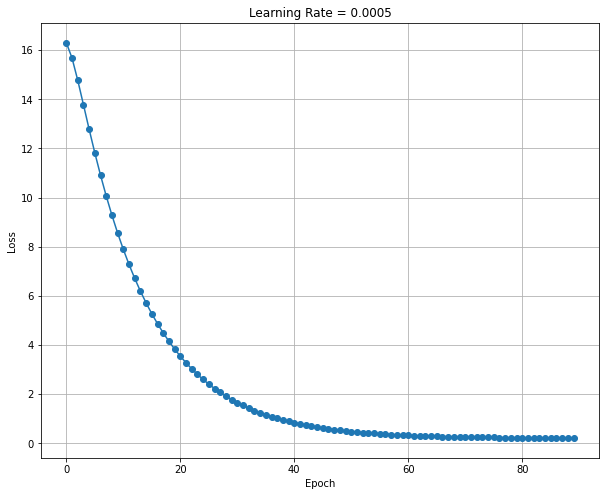

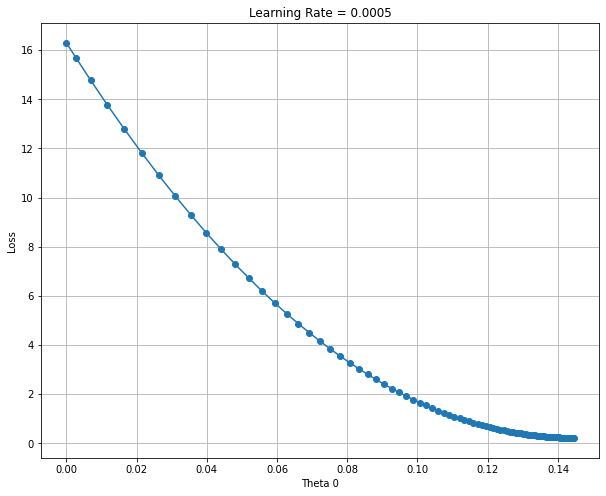

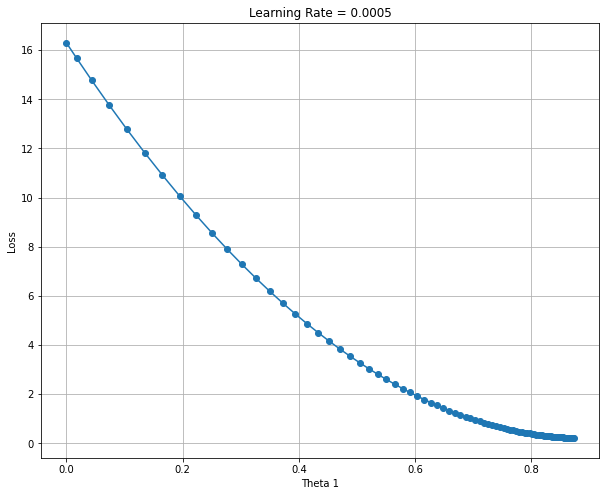

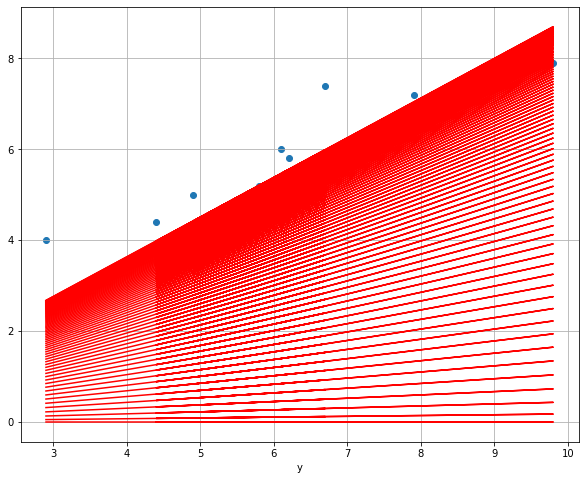

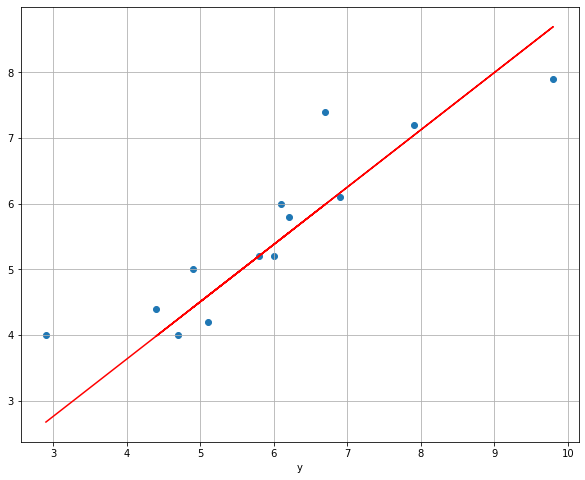

In [190]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [191]:
alpha = 0.0005
gamma = 0.9
iterations = 300
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Momentum_single_variable_mini_batch(X, y, alpha, gamma, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =  16.305384479692318

Gradient Vector:
 [[ -5.56923074]
 [-35.04384604]]

Gradient Vector Norm:
 35.483622652335995

theta_0_new 0.002784615369884615
theta_1_new 0.017521923021607686

****************** Epoch 1 ********************

h(x): [0.05359819 0.1201815  0.08864204 0.14120781 0.17449946 0.12368589
 0.10966834 0.11142053 0.10791615 0.09214642 0.08513765 0.07988108
 0.10441177]

Error Vector:
 [-3.94640181 -7.2798186  -4.91135796 -7.058792   -7.72550063 -5.97631402
 -5.89033166 -5.68857966 -5.09208366 -4.10785339 -3.91486235 -4.32011902
 -5.09558804]

j =  15.681993489159844

Gradient Vector:
 [[ -5.46212329]
 [-34.35857637]]

Gradient Vector Norm:
 34.79003537202773

theta_0_new 0.008021830847921999
theta_1_new

In [192]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.6060313727124877


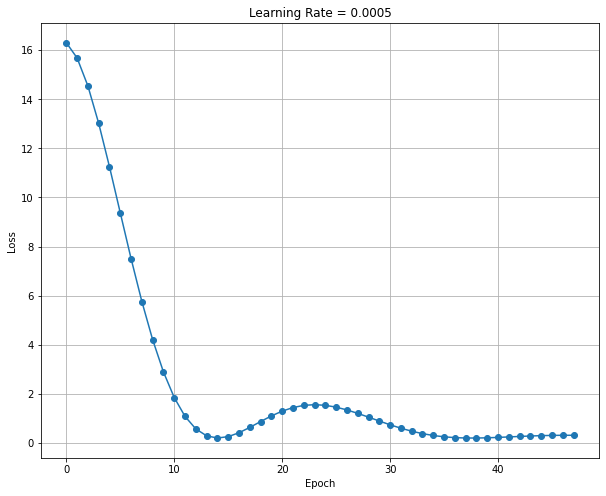

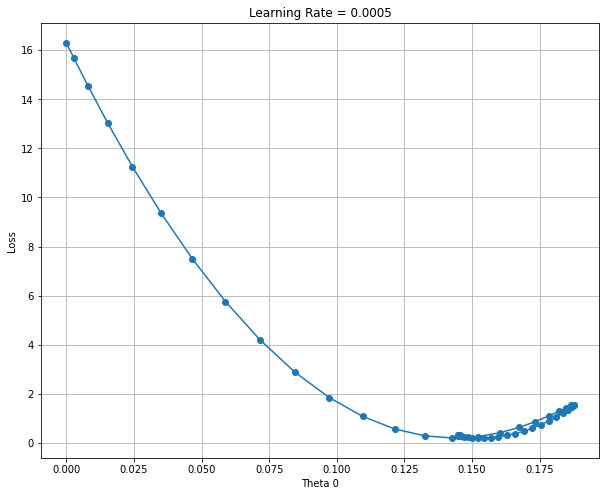

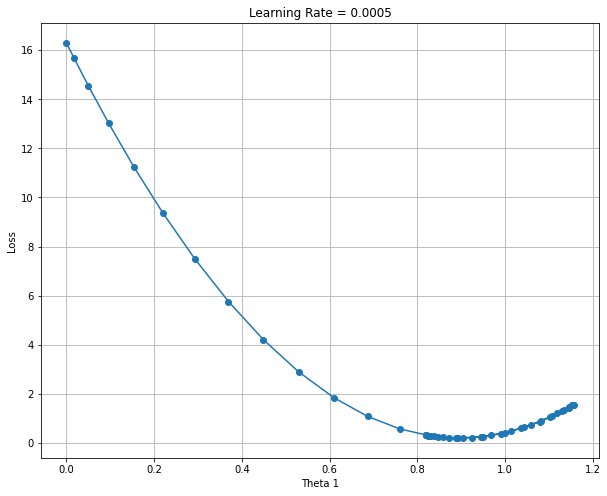

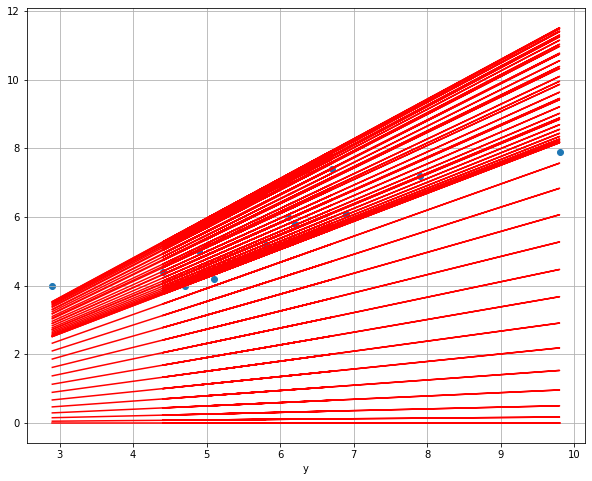

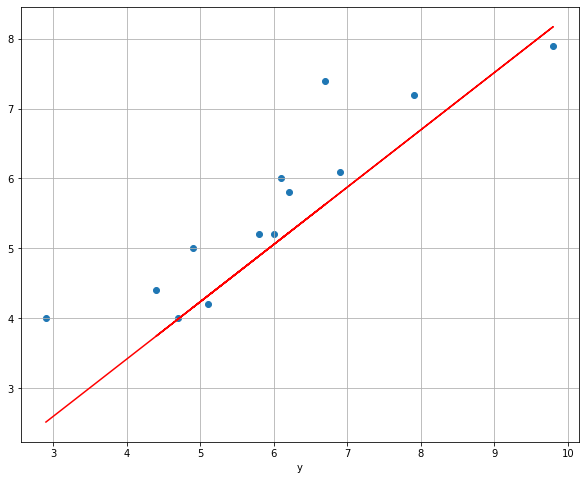

In [193]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [194]:
alpha = 0.0005
gamma = 0.89
iterations = 300
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Momentum_single_variable_mini_batch(X, y, alpha, gamma, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =  16.305384479692318

Gradient Vector:
 [[ -5.56923074]
 [-35.04384604]]

Gradient Vector Norm:
 35.483622652335995

theta_0_new 0.002784615369884615
theta_1_new 0.017521923021607686

****************** Epoch 1 ********************

h(x): [0.05359819 0.1201815  0.08864204 0.14120781 0.17449946 0.12368589
 0.10966834 0.11142053 0.10791615 0.09214642 0.08513765 0.07988108
 0.10441177]

Error Vector:
 [-3.94640181 -7.2798186  -4.91135796 -7.058792   -7.72550063 -5.97631402
 -5.89033166 -5.68857966 -5.09208366 -4.10785339 -3.91486235 -4.32011902
 -5.09558804]

j =  15.681993489159844

Gradient Vector:
 [[ -5.46212329]
 [-34.35857637]]

Gradient Vector Norm:
 34.79003537202773

theta_0_new 0.007993984694223154
theta_1_new

In [195]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.7467162479748675


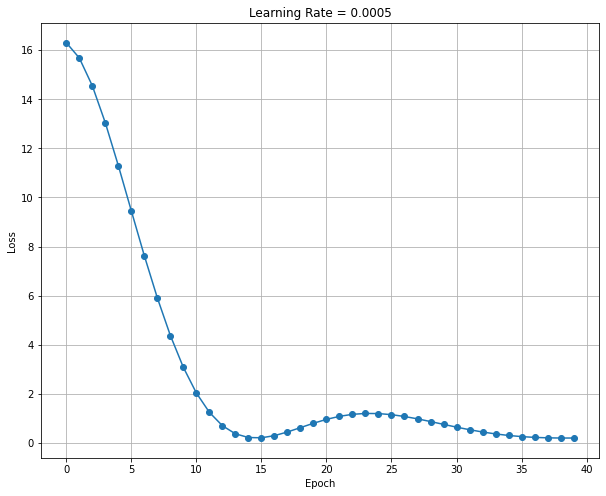

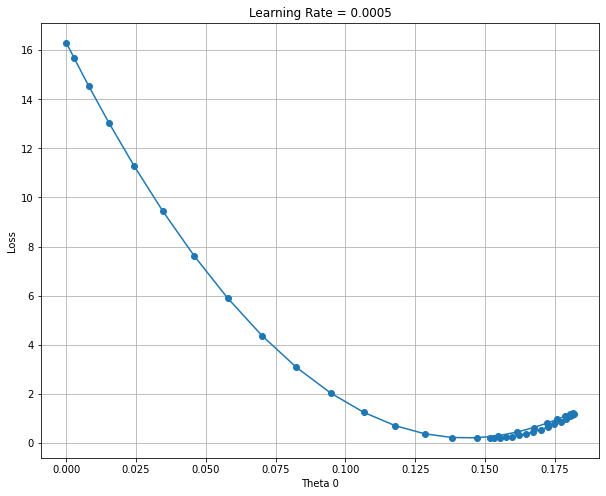

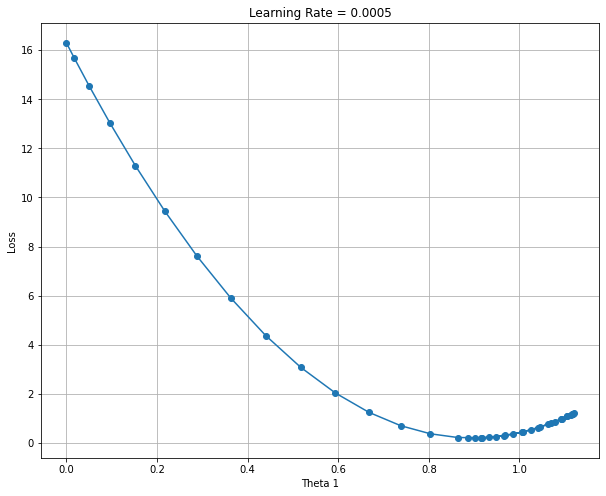

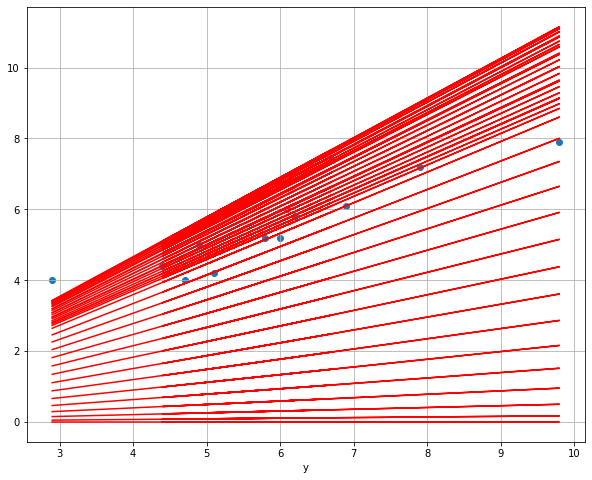

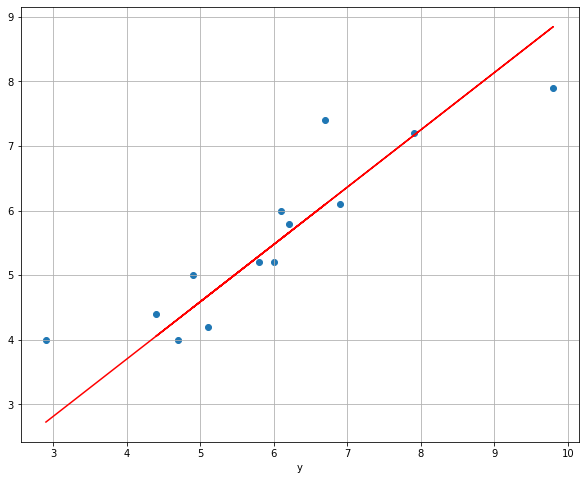

In [196]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

## Multivariate

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,X, and x3.
#### The last column is the target label y.

In [197]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [198]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [199]:
X = data[:, :-1]
y = data[:, -1]

In [200]:
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [201]:
y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b> 
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [202]:
X = np.insert(X, 0, 1, axis=1)
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [203]:
y = y.reshape(len(y), 1)
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

## Momentum

#### Full Batch

In [204]:
def Momentum_multi_variable_batch(X, y, alpha, gamma, maxNumIters, ones=False):

    # Append ones to first columns if 'ones' parameter is true
    if ones:
      X = np.insert(X, 0, 1, axis=1)
    
    # 1- Initialize parameters and hyper-paramters
    theta = np.zeros((X.shape[1], 1))
    v = np.zeros((X.shape[1], 1))

    gradient_check = 0.001
    cost_check = 0.001

    theta_list = []
    cost = []
    hypothesis = []
    for i in range(maxNumIters):
        print(f'****************** Iteration {i} ********************')
        print()

        theta_list.append(theta)

        # 2- Prediction
        h = X @ theta
        hypothesis.append(h)

        # 3- Evaluate Prediction (Calculate loss/cost function)
        error = h - y

        # j = np.sum(error**2) / (2*m) # --> Normal equation
        # j = np.linalg.norm(error)**2 / (2*m) # --> By vector Norm
        j = error.T @ error / (2*len(X)) # --> By dot product

        cost.append(j.squeeze())

        # 4- Get gradient
        d_theta = X.T @ error / len(X)

        # 5- Update parameters
        v = gamma * v + alpha * d_theta
        
        theta = theta - v

        d_theta_norm = np.linalg.norm(d_theta)

        print('h(x):\n', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()

        if i > 0:
            if d_theta_norm <= gradient_check or abs(cost[-1] - cost[-2]) <= cost_check:
                break
        
        print('thetas_new : \n ', theta)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {i+1} iterations')
    print()

    print('theta_Opt : \n', theta)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return theta_list, cost, hypothesis, theta_list[-1]


#### Mini Batch

In [205]:
def Momentum_multi_variable_mini_batch(X, y, alpha, gamma, maxNumIters, batch_size=None, ones=False):

    # if batch not specified, consider it as full batch
    if not batch_size:
      batch_size = len(X)
    
    # Append ones to first columns if 'ones' parameter is true
    if ones:
      X = np.insert(X, 0, 1, axis=1)

    # 1- Initialize parameters and hyper-paramters
    theta = np.zeros((X.shape[1], 1))
    v = np.zeros((X.shape[1], 1))

    gradient_check = 0.001
    cost_check = 0.001

    theta_list = []
    cost = []
    cost_per_epoch = []
    hypothesis = []
    for epoch in range(maxNumIters):
        print(f'****************** Epoch {epoch} ********************')
        print()

        for i in range(len(X) // batch_size):

            theta_list.append(theta)

            # 2- Prediction
            start = i * batch_size
            end = i * batch_size + batch_size

            h = X[start:end] @ theta
            hypothesis.append(h)

            # 3- Evaluate Prediction (Calculate loss/cost function)
            error = h - y[start:end]
            j = error.T @ error / (2*batch_size)
            cost.append(j.squeeze())

            # 4- Get gradient
            d_theta = X[start:end].T @ error / batch_size

            # 5- Update parameters
            v = gamma * v + alpha * d_theta
            
            theta = theta - v

        d_theta_norm = np.linalg.norm(d_theta)
      
        cost_per_epoch.append(j)

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()

        if epoch > 0:
            if d_theta_norm <= gradient_check or abs(cost_per_epoch[-1] - cost_per_epoch[-2]) <= cost_check:
                break
        
        print('theta_new', theta)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {epoch+1} iterations')
    print()

    print('theta_Opt : ', theta)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return theta_list, cost, hypothesis, theta_list[-1]

#### Stochastic

In [206]:
def Momentum_multi_variable_stochastic(X, y, alpha, gamma, maxNumIters, ones=False):

    # Append ones to first columns if 'ones' parameter is true
    if ones:
      X = np.insert(X, 0, 1, axis=1)

    # 1- Initialize parameters and hyper-paramters
    theta = np.zeros((X.shape[1], 1))
    v = np.zeros((X.shape[1], 1))

    gradient_check = 0.001
    cost_check = 0.001

    theta_list = []
    cost = []
    cost_per_epoch = []
    hypothesis = []
    
    for epoch in range(maxNumIters):
        print(f'****************** Epoch {epoch} ********************')
        print()

        for i in range(len(X)):

            theta_list.append(theta)

            # 2- Prediction
            h = X[i] @ theta
            hypothesis.append(h)

            # 3- Evaluate Prediction (Calculate loss/cost function)
            error = h - y[i]
            j = error.T @ error / (2)
            cost.append(j.squeeze())

            # 4- Get gradient
            d_theta = X[i].T * error
            
            # 5- Update parameters
            v = (gamma * v + alpha * d_theta)[0].reshape(-1, 1)
            
            theta = theta - v

        d_theta_norm = np.linalg.norm(d_theta)

        cost_per_epoch.append(j)

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()

        if epoch > 0:
            if d_theta_norm <= gradient_check or abs(cost_per_epoch[-1] - cost_per_epoch[-2]) <= cost_check:
                break
        
        print('theta_new', theta)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {epoch+1} iterations')
    print()

    print('theta_Opt : ', theta)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return theta_list, cost, hypothesis, theta_list[-1]

### Play with the parameters and see the results

##### The following results uses alpha = 0.00005, gamma=0.5 and max. iterations = 300.

In [207]:
alpha = 0.00005
gamma = 0.5
iterations = 300
theta_list, cost, hypothesis, theta_opt = Momentum_multi_variable_mini_batch(X, y, alpha, gamma, iterations)

Streaming output truncated to the last 5000 lines.
j =  [[4.24568906]]

Gradient Vector:
 [[ 0.04078102]
 [ 3.00356435]
 [ 2.51469004]
 [-5.37690957]]

theta_new [[0.00758689]
 [0.58773617]
 [0.5918507 ]
 [0.84165824]]

****************** Epoch 228 ********************

h(x): [[153.38475171]
 [185.02412911]
 [181.92376181]
 [198.59745234]
 [140.89055067]
 [104.67393957]
 [149.1660193 ]
 [111.27432078]
 [173.64608104]
 [161.93421886]
 [143.43198352]
 [141.90212442]
 [187.48376754]
 [155.22785226]
 [150.00356301]
 [188.14095454]
 [147.47257136]
 [179.15499646]
 [178.56124337]
 [159.78230116]
 [174.8503551 ]
 [173.99223873]
 [166.5155671 ]
 [153.55687937]
 [191.42990762]]

Error Vector:
 [[ 1.38475171]
 [ 0.02412911]
 [ 1.92376181]
 [ 2.59745234]
 [-1.10944933]
 [ 3.67393957]
 [ 0.1660193 ]
 [-3.72567922]
 [-1.35391896]
 [-2.06578114]
 [ 2.43198352]
 [ 0.90212442]
 [ 3.48376754]
 [ 3.22785226]
 [ 2.00356301]
 [-3.85904546]
 [ 0.47257136]
 [-3.84500354]
 [ 1.56124337]
 [ 0.78230116]
 [-2.1

In [208]:
h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9857029572740502


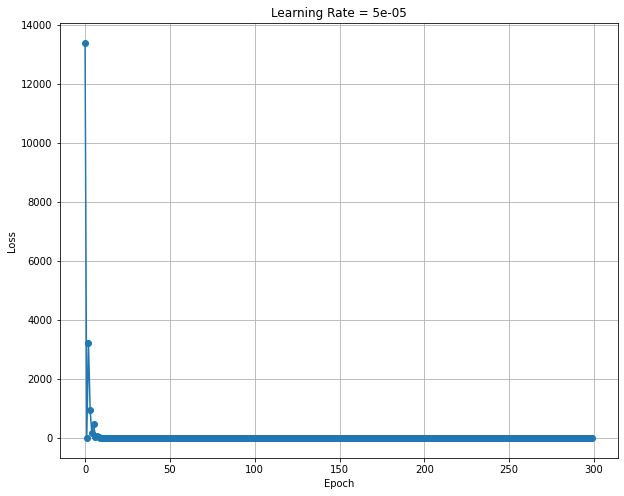

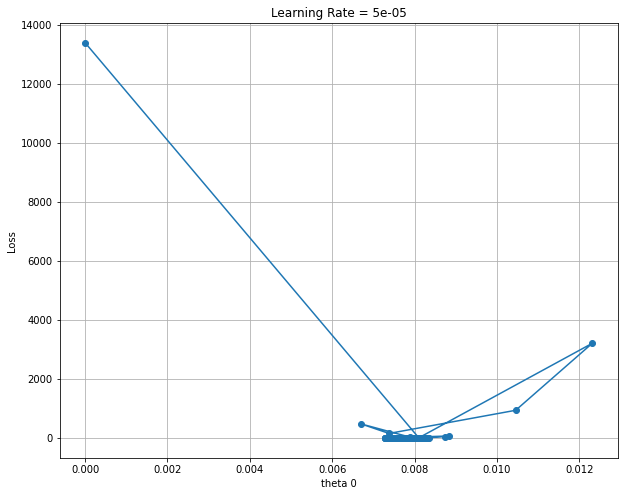

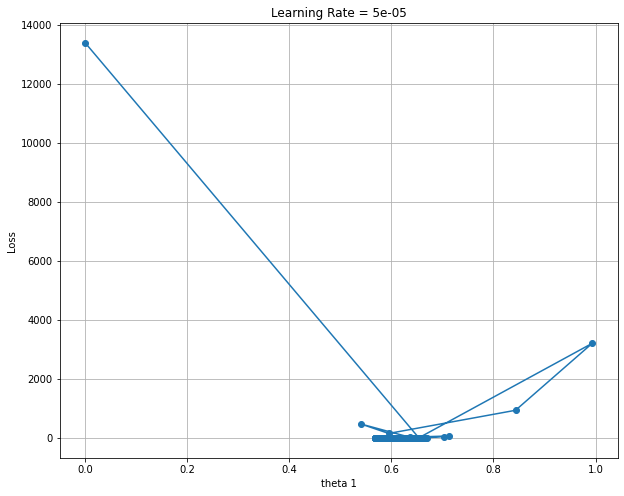

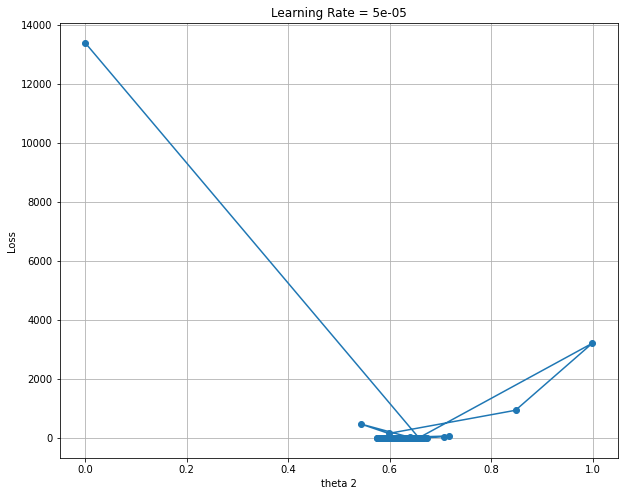

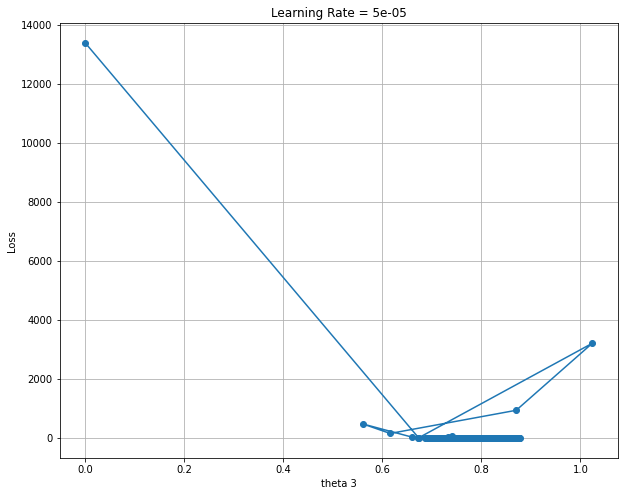

In [209]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.00005, gamma=0.9 and max. iterations = 300.

In [210]:
alpha = 0.00005
gamma = 0.9
iterations = 300
theta_list, cost, hypothesis, theta_opt = Momentum_multi_variable_batch(X, y, alpha, gamma, iterations)

Streaming output truncated to the last 5000 lines.
j =  [[11.18477351]]

Gradient Vector:
 [[  -3.62690186]
 [-292.81477139]
 [-294.92095165]
 [-310.03641037]]

thetas_new : 
  [[0.00826372]
 [0.63467527]
 [0.63529825]
 [0.87725425]]

****************** Iteration 49 ********************

h(x):
 [[162.9574875 ]
 [196.52395548]
 [193.25938639]
 [210.92174357]
 [149.67704074]
 [111.11875651]
 [158.36150542]
 [118.04995865]
 [184.36645684]
 [171.81686191]
 [152.31129541]
 [150.64673368]
 [199.21653473]
 [165.01103063]
 [159.2381367 ]
 [199.79101649]
 [156.81359284]
 [190.17844873]
 [189.75099236]
 [169.79126712]
 [185.64016824]
 [184.76042207]
 [176.80930114]
 [163.25839106]
 [203.35898105]]

Error Vector:
 [[10.9574875 ]
 [11.52395548]
 [13.25938639]
 [14.92174357]
 [ 7.67704074]
 [10.11875651]
 [ 9.36150542]
 [ 3.04995865]
 [ 9.36645684]
 [ 7.81686191]
 [11.31129541]
 [ 9.64673368]
 [15.21653473]
 [13.01103063]
 [11.2381367 ]
 [ 7.79101649]
 [ 9.81359284]
 [ 7.17844873]
 [12.75099236]
 [

In [211]:
h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9876284847741124


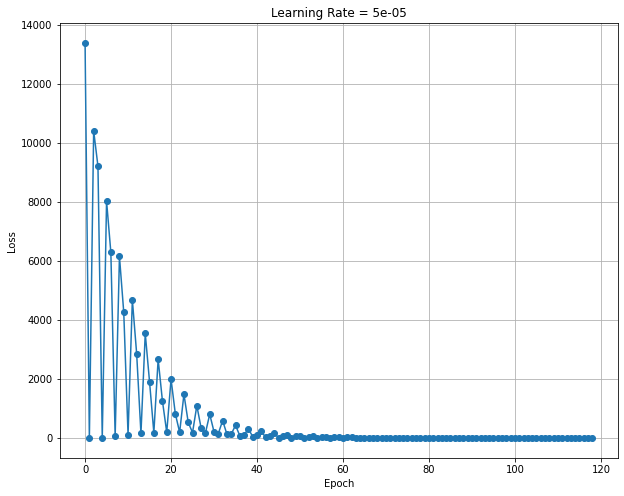

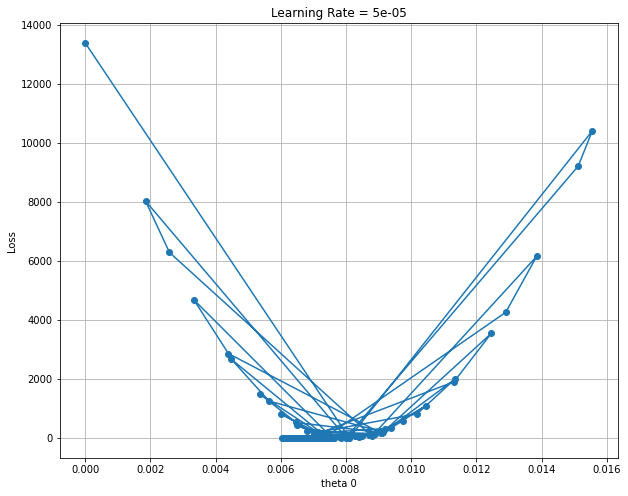

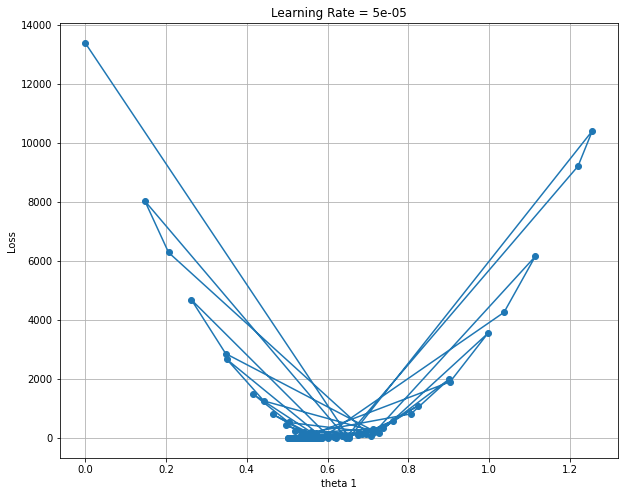

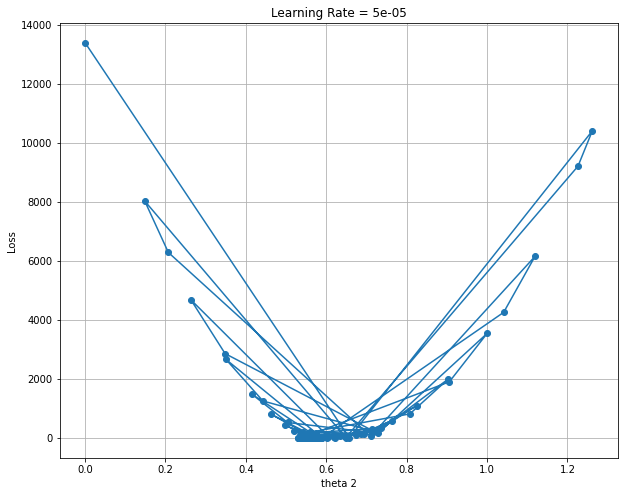

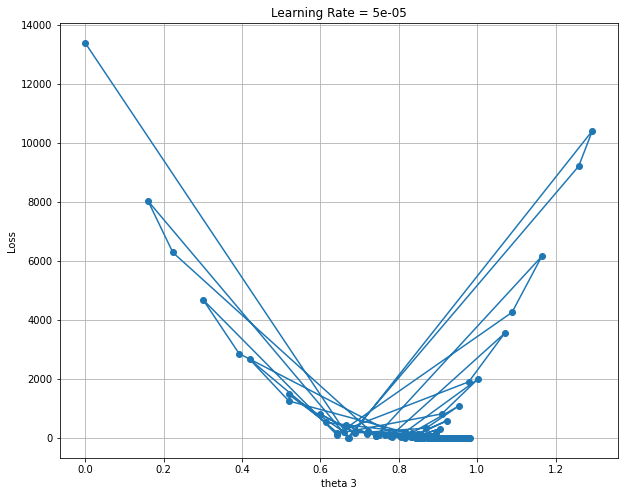

In [212]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.00005, gamma=0.89 and max. iterations = 300.

In [213]:
alpha = 0.00005
gamma = 0.89
iterations = 300
theta_list, cost, hypothesis, theta_opt = Momentum_multi_variable_batch(X, y, alpha, gamma, iterations)

Streaming output truncated to the last 5000 lines.
j =  [[21.9726713]]

Gradient Vector:
 [[  5.9392938 ]
 [479.04174036]
 [481.11328141]
 [484.51226766]]

thetas_new : 
  [[0.00763829]
 [0.5846447 ]
 [0.58618363]
 [0.84472043]]

****************** Iteration 57 ********************

h(x):
 [[152.93542373]
 [184.52275444]
 [181.40856525]
 [198.05156782]
 [140.50525079]
 [104.4178778 ]
 [148.769184  ]
 [110.99544801]
 [173.2050723 ]
 [161.56282117]
 [143.04556778]
 [141.54401476]
 [186.93659899]
 [154.75385108]
 [149.61236549]
 [187.64309935]
 [147.01468611]
 [178.67938529]
 [178.03122247]
 [159.30663897]
 [174.38513419]
 [173.53425806]
 [166.06440237]
 [153.06902701]
 [190.89704754]]

Error Vector:
 [[ 0.93542373]
 [-0.47724556]
 [ 1.40856525]
 [ 2.05156782]
 [-1.49474921]
 [ 3.4178778 ]
 [-0.230816  ]
 [-4.00455199]
 [-1.7949277 ]
 [-2.43717883]
 [ 2.04556778]
 [ 0.54401476]
 [ 2.93659899]
 [ 2.75385108]
 [ 1.61236549]
 [-4.35690065]
 [ 0.01468611]
 [-4.32061471]
 [ 1.03122247]
 [ 0.30

In [214]:
h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9877300155698439


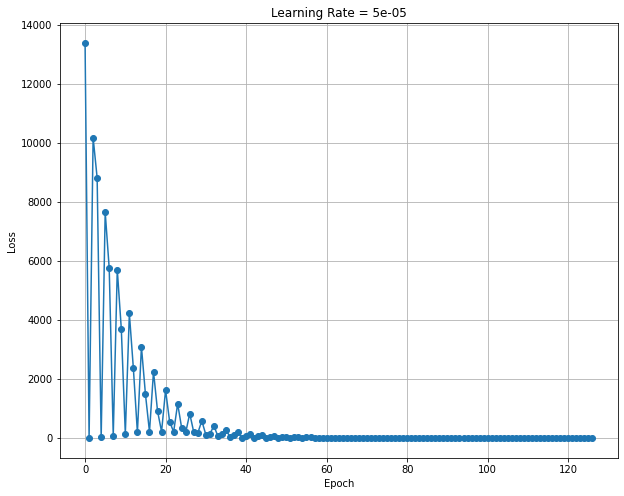

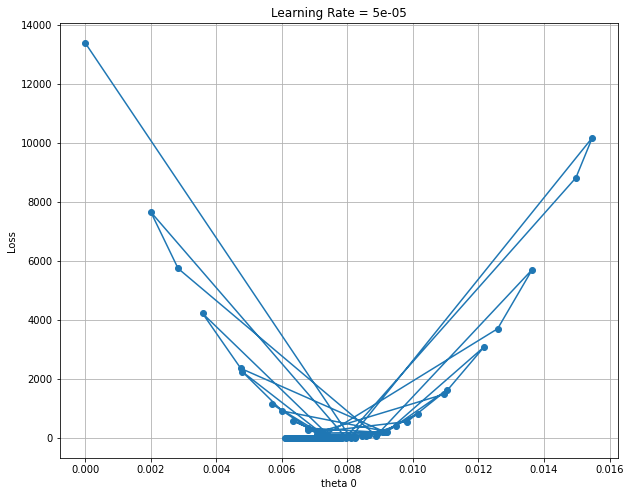

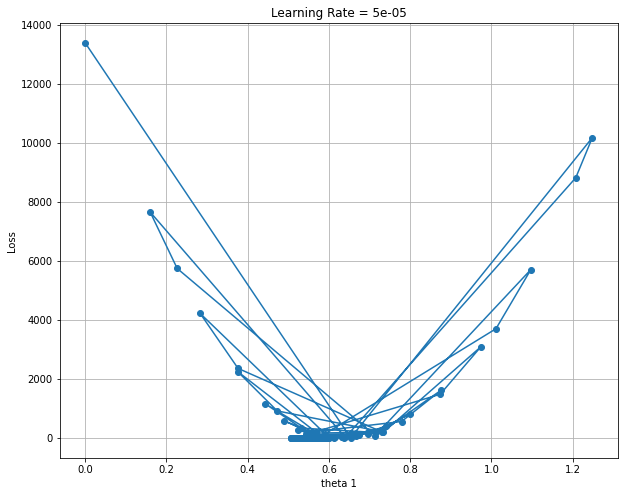

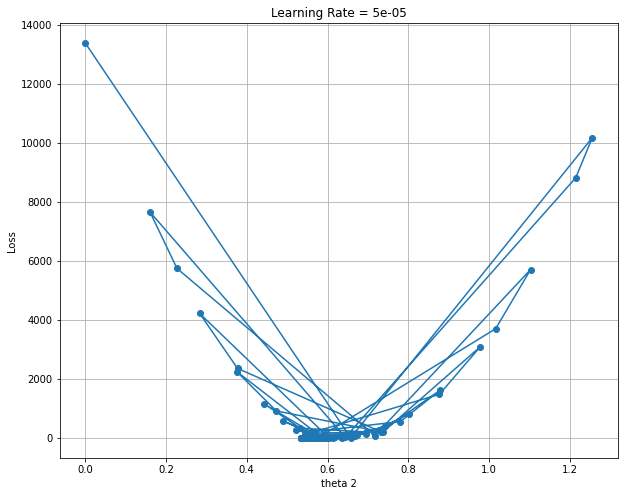

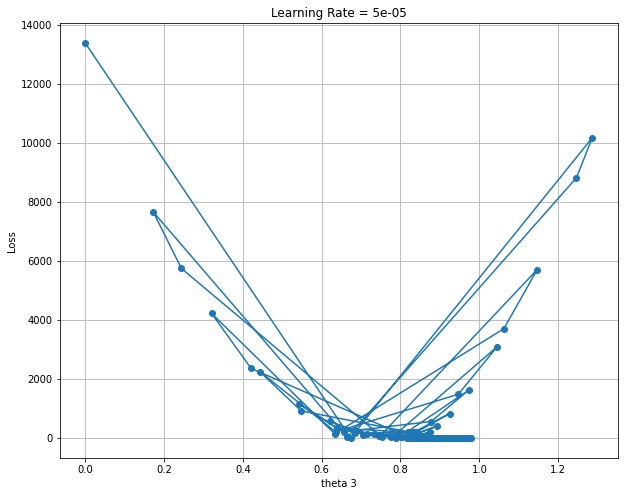

In [215]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')